In [1]:
# Final Project - Word Embedding with Neural Networks
# Student: Christopher Mastrangelo
# note that in order to use this you must create a new conda environment withe the correct version of python and other tools
# when running this notebook the kernel must be switched to the new env 'final_project'
# also make sure to use unique file names for inputs and outputs

import itertools
import pandas as pd
import numpy as np
import re
import os
from tqdm import tqdm

# Drawing the embeddings
import matplotlib.pyplot as plt

In [2]:
# Deep learning: more dependencies
# luckily all the required packages were already installed in my mlenv anaconda environment used in class

from keras.models import Input, Model
from keras.layers import Dense

from scipy import sparse

# Custom functions- my own version saved in my local folder
from utils import text_preprocessing, create_unique_word_dict, clean_text

Using TensorFlow backend.


In [3]:
# here is where the real code begins 

# Defining the window for context
window = 2

# Reading the text from the input folder
texts = pd.read_csv('input/sample_email.csv')
# restore later after I play around with manually introducing new text
texts = [x for x in texts['text']]

# Creating a placeholder for the scanning of the word list
word_lists = []
all_text = []

for text in texts:

    # Cleaning the text
    text = text_preprocessing(text)

    # Appending to the all text list
    all_text += text 

    # Creating a context dictionary
    for i, word in enumerate(text):
        for w in range(window):
            # Getting the context that is ahead by *window* words
            if i + 1 + w < len(text): 
                word_lists.append([word] + [text[(i + 1 + w)]])
            # Getting the context that is behind by *window* words    
            if i - w - 1 >= 0:
                word_lists.append([word] + [text[(i - w - 1)]])
                
unique_word_dict = create_unique_word_dict(all_text)

# Defining the number of features (unique words)
n_words = len(unique_word_dict)

# Getting all the unique words 
words = list(unique_word_dict.keys())

# Creating the X and Y matrices using one hot encoding
X = []
Y = []

In [4]:
# for simplicity and debugging I am splitting up the code into cells that can be run individually
for i, word_list in tqdm(enumerate(word_lists)):
    # Getting the indices
    main_word_index = unique_word_dict.get(word_list[0])
    context_word_index = unique_word_dict.get(word_list[1])

    # Creating the placeholders   
    X_row = np.zeros(n_words)
    Y_row = np.zeros(n_words)

    # One hot encoding the main word
    X_row[main_word_index] = 1

    # One hot encoding the Y matrix words 
    Y_row[context_word_index] = 1

    # Appending to the main matrices
    X.append(X_row)
    Y.append(Y_row)

# Converting the matrices into a sparse format because the vast majority of the data are 0s
X = sparse.csr_matrix(X)
Y = sparse.csr_matrix(Y)


1356it [00:00, 18088.61it/s]


In [5]:
# lets inspect the contents of the variables before moving to the next steps 
# looks like the X variable has 1355 data points

print(all_text)

['this', 'story', 'about', 'astronomy', 'comet', 'kohoutek', 'was', 'poster', 'child', 'for', 'comet', 'that', 'faded', 'did', 'not', 'live', 'up', 'to', 'expectations', 'i', 'saw', 'it', 'when', 'it', 'was', 'close', 'to', 'sun', 'from', 'balcony', 'of', 'lbj', 'apartment', 'building', 'because', 'kohoutek', 'fell', 'short', 'of', 'expectations', 'its', 'name', 'became', 'synonymous', 'with', 'disappointment', 'we', 'have', 'learned', 'why', 'kohoutek', 'faded', 'other', 'comets', 'brightened', 'when', 'close', 'to', 'sun', 'kohoutek', 'was', 'an', 'oort', 'cloud', 'comet', 'on', 'its', 'first', 'visit', 'to', 'inner', 'solar', 'system', 'most', 'of', 'ices', 'on', 'its', 'surface', 'evaporated', 'early', 'while', 'it', 'was', 'still', 'relatively', 'far', 'out', 'space', 'when', 'it', 'brightened', 'dramatically', 'while', 'still', 'beyond', 'orbit', 'of', 'mars', 'astronomers', 'at', 'time', 'thought', 'light', 'curve', 'would', 'continue', 'to', 'rise', 'but', 'fact', 'outburst', '

In [6]:
# here is the next chunk of code to make sure it runs 
# we get an error from the model.fit so lets walk it through 1 line at a time

# STOP HERE FOR NOW UNTIL I COMPLETE MORE TROUBLESHOOTING 

# Defining the size of the embedding
embed_size = 2

# Defining the neural network
inp = Input(shape=(X.shape[1],))
x = Dense(units=embed_size, activation='linear')(inp)
x = Dense(units=Y.shape[1], activation='softmax')(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')



In [7]:
# Optimizing the network weights
model.fit(
    x=X, 
    y=Y, 
    batch_size=256,
    epochs=1000
    )

Epoch 1/1000
1356/1356 [==============================] - 4s 3ms/step - loss: 5.3976
Epoch 2/1000
1356/1356 [==============================] - 0s 69us/step - loss: 5.3945
Epoch 3/1000
1356/1356 [==============================] - 0s 64us/step - loss: 5.3917
Epoch 4/1000
1356/1356 [==============================] - 0s 58us/step - loss: 5.3889
Epoch 5/1000
1356/1356 [==============================] - 0s 71us/step - loss: 5.3862
Epoch 6/1000
1356/1356 [==============================] - 0s 76us/step - loss: 5.3834
Epoch 7/1000
1356/1356 [==============================] - 0s 66us/step - loss: 5.3806
Epoch 8/1000
1356/1356 [==============================] - 0s 62us/step - loss: 5.3778
Epoch 9/1000
1356/1356 [==============================] - 0s 59us/step - loss: 5.3750
Epoch 10/1000
1356/1356 [==============================] - 0s 55us/step - loss: 5.3720
Epoch 11/1000
1356/1356 [==============================] - 0s 62us/step - loss: 5.3690
Epoch 12/1000
1356/1356 [============================

1356/1356 [==============================] - 0s 50us/step - loss: 4.9587
Epoch 96/1000
1356/1356 [==============================] - 0s 51us/step - loss: 4.9568
Epoch 97/1000
1356/1356 [==============================] - 0s 52us/step - loss: 4.9549
Epoch 98/1000
1356/1356 [==============================] - 0s 51us/step - loss: 4.9530
Epoch 99/1000
1356/1356 [==============================] - 0s 60us/step - loss: 4.9511
Epoch 100/1000
1356/1356 [==============================] - 0s 55us/step - loss: 4.9491
Epoch 101/1000
1356/1356 [==============================] - 0s 51us/step - loss: 4.9473
Epoch 102/1000
1356/1356 [==============================] - 0s 50us/step - loss: 4.9455
Epoch 103/1000
1356/1356 [==============================] - 0s 50us/step - loss: 4.9437
Epoch 104/1000
1356/1356 [==============================] - 0s 63us/step - loss: 4.9421
Epoch 105/1000
1356/1356 [==============================] - 0s 61us/step - loss: 4.9403
Epoch 106/1000
1356/1356 [=========================

1356/1356 [==============================] - 0s 69us/step - loss: 4.8014
Epoch 189/1000
1356/1356 [==============================] - 0s 80us/step - loss: 4.7995
Epoch 190/1000
1356/1356 [==============================] - 0s 69us/step - loss: 4.7976
Epoch 191/1000
1356/1356 [==============================] - 0s 71us/step - loss: 4.7957
Epoch 192/1000
1356/1356 [==============================] - 0s 82us/step - loss: 4.7937
Epoch 193/1000
1356/1356 [==============================] - 0s 77us/step - loss: 4.7918
Epoch 194/1000
1356/1356 [==============================] - 0s 73us/step - loss: 4.7899
Epoch 195/1000
1356/1356 [==============================] - 0s 85us/step - loss: 4.7880
Epoch 196/1000
1356/1356 [==============================] - 0s 89us/step - loss: 4.7860
Epoch 197/1000
1356/1356 [==============================] - 0s 88us/step - loss: 4.7841
Epoch 198/1000
1356/1356 [==============================] - 0s 73us/step - loss: 4.7822
Epoch 199/1000
1356/1356 [=====================

1356/1356 [==============================] - 0s 85us/step - loss: 4.6263
Epoch 281/1000
1356/1356 [==============================] - 0s 94us/step - loss: 4.6247
Epoch 282/1000
1356/1356 [==============================] - 0s 78us/step - loss: 4.6230
Epoch 283/1000
1356/1356 [==============================] - 0s 77us/step - loss: 4.6213
Epoch 284/1000
1356/1356 [==============================] - 0s 70us/step - loss: 4.6196
Epoch 285/1000
1356/1356 [==============================] - 0s 78us/step - loss: 4.6179
Epoch 286/1000
1356/1356 [==============================] - 0s 87us/step - loss: 4.6162
Epoch 287/1000
1356/1356 [==============================] - 0s 94us/step - loss: 4.6145
Epoch 288/1000
1356/1356 [==============================] - 0s 114us/step - loss: 4.6129
Epoch 289/1000
1356/1356 [==============================] - 0s 99us/step - loss: 4.6112
Epoch 290/1000
1356/1356 [==============================] - 0s 153us/step - loss: 4.6095
Epoch 291/1000
1356/1356 [===================

1356/1356 [==============================] - 0s 69us/step - loss: 4.4956
Epoch 373/1000
1356/1356 [==============================] - 0s 75us/step - loss: 4.4945
Epoch 374/1000
1356/1356 [==============================] - 0s 87us/step - loss: 4.4933
Epoch 375/1000
1356/1356 [==============================] - 0s 92us/step - loss: 4.4922
Epoch 376/1000
1356/1356 [==============================] - 0s 128us/step - loss: 4.4911
Epoch 377/1000
1356/1356 [==============================] - 0s 87us/step - loss: 4.4899: 0s - loss: 4.488
Epoch 378/1000
1356/1356 [==============================] - 0s 88us/step - loss: 4.4888
Epoch 379/1000
1356/1356 [==============================] - 0s 76us/step - loss: 4.4877
Epoch 380/1000
1356/1356 [==============================] - 0s 70us/step - loss: 4.4866
Epoch 381/1000
1356/1356 [==============================] - 0s 69us/step - loss: 4.4854
Epoch 382/1000
1356/1356 [==============================] - 0s 71us/step - loss: 4.4843
Epoch 383/1000
1356/1356 [==

1356/1356 [==============================] - 0s 71us/step - loss: 4.4047
Epoch 466/1000
1356/1356 [==============================] - 0s 73us/step - loss: 4.4039
Epoch 467/1000
1356/1356 [==============================] - 0s 69us/step - loss: 4.4031
Epoch 468/1000
1356/1356 [==============================] - 0s 128us/step - loss: 4.4022
Epoch 469/1000
1356/1356 [==============================] - 0s 143us/step - loss: 4.4014
Epoch 470/1000
1356/1356 [==============================] - 0s 75us/step - loss: 4.4005
Epoch 471/1000
1356/1356 [==============================] - 0s 106us/step - loss: 4.3997
Epoch 472/1000
1356/1356 [==============================] - 0s 146us/step - loss: 4.3989 0s - loss: 4.402
Epoch 473/1000
1356/1356 [==============================] - 0s 85us/step - loss: 4.3981
Epoch 474/1000
1356/1356 [==============================] - 0s 94us/step - loss: 4.3973
Epoch 475/1000
1356/1356 [==============================] - 0s 100us/step - loss: 4.3965
Epoch 476/1000
1356/1356 

1356/1356 [==============================] - 0s 66us/step - loss: 4.3366
Epoch 558/1000
1356/1356 [==============================] - 0s 80us/step - loss: 4.3359
Epoch 559/1000
1356/1356 [==============================] - 0s 81us/step - loss: 4.3352
Epoch 560/1000
1356/1356 [==============================] - 0s 94us/step - loss: 4.3346
Epoch 561/1000
1356/1356 [==============================] - 0s 94us/step - loss: 4.3340
Epoch 562/1000
1356/1356 [==============================] - 0s 78us/step - loss: 4.3333
Epoch 563/1000
1356/1356 [==============================] - 0s 73us/step - loss: 4.3327
Epoch 564/1000
1356/1356 [==============================] - 0s 74us/step - loss: 4.3320
Epoch 565/1000
1356/1356 [==============================] - 0s 83us/step - loss: 4.3313
Epoch 566/1000
1356/1356 [==============================] - 0s 85us/step - loss: 4.3307
Epoch 567/1000
1356/1356 [==============================] - 0s 96us/step - loss: 4.3300
Epoch 568/1000
1356/1356 [=====================

Epoch 650/1000
1356/1356 [==============================] - 0s 71us/step - loss: 4.2804
Epoch 651/1000
1356/1356 [==============================] - 0s 71us/step - loss: 4.2799
Epoch 652/1000
1356/1356 [==============================] - 0s 71us/step - loss: 4.2793
Epoch 653/1000
1356/1356 [==============================] - 0s 86us/step - loss: 4.2787
Epoch 654/1000
1356/1356 [==============================] - 0s 74us/step - loss: 4.2782
Epoch 655/1000
1356/1356 [==============================] - 0s 74us/step - loss: 4.2777
Epoch 656/1000
1356/1356 [==============================] - 0s 70us/step - loss: 4.2771
Epoch 657/1000
1356/1356 [==============================] - 0s 67us/step - loss: 4.2767
Epoch 658/1000
1356/1356 [==============================] - 0s 67us/step - loss: 4.2761
Epoch 659/1000
1356/1356 [==============================] - 0s 69us/step - loss: 4.2755
Epoch 660/1000
1356/1356 [==============================] - 0s 80us/step - loss: 4.2750
Epoch 661/1000
1356/1356 [======

1356/1356 [==============================] - 0s 67us/step - loss: 4.2327
Epoch 744/1000
1356/1356 [==============================] - 0s 68us/step - loss: 4.2323
Epoch 745/1000
1356/1356 [==============================] - 0s 68us/step - loss: 4.2318
Epoch 746/1000
1356/1356 [==============================] - 0s 68us/step - loss: 4.2313
Epoch 747/1000
1356/1356 [==============================] - 0s 71us/step - loss: 4.2308
Epoch 748/1000
1356/1356 [==============================] - 0s 77us/step - loss: 4.2303
Epoch 749/1000
1356/1356 [==============================] - 0s 69us/step - loss: 4.2299
Epoch 750/1000
1356/1356 [==============================] - 0s 68us/step - loss: 4.2294
Epoch 751/1000
1356/1356 [==============================] - 0s 64us/step - loss: 4.2289
Epoch 752/1000
1356/1356 [==============================] - 0s 69us/step - loss: 4.2284
Epoch 753/1000
1356/1356 [==============================] - 0s 71us/step - loss: 4.2280
Epoch 754/1000
1356/1356 [=====================

1356/1356 [==============================] - 0s 67us/step - loss: 4.1920
Epoch 836/1000
1356/1356 [==============================] - 0s 72us/step - loss: 4.1917
Epoch 837/1000
1356/1356 [==============================] - 0s 69us/step - loss: 4.1912
Epoch 838/1000
1356/1356 [==============================] - 0s 66us/step - loss: 4.1908
Epoch 839/1000
1356/1356 [==============================] - 0s 66us/step - loss: 4.1904
Epoch 840/1000
1356/1356 [==============================] - 0s 74us/step - loss: 4.1900
Epoch 841/1000
1356/1356 [==============================] - 0s 75us/step - loss: 4.1895
Epoch 842/1000
1356/1356 [==============================] - 0s 67us/step - loss: 4.1891
Epoch 843/1000
1356/1356 [==============================] - 0s 75us/step - loss: 4.1887
Epoch 844/1000
1356/1356 [==============================] - 0s 74us/step - loss: 4.1882
Epoch 845/1000
1356/1356 [==============================] - 0s 64us/step - loss: 4.1878
Epoch 846/1000
1356/1356 [=====================

1356/1356 [==============================] - 0s 68us/step - loss: 4.1561
Epoch 929/1000
1356/1356 [==============================] - 0s 77us/step - loss: 4.1558
Epoch 930/1000
1356/1356 [==============================] - 0s 66us/step - loss: 4.1554
Epoch 931/1000
1356/1356 [==============================] - 0s 49us/step - loss: 4.1550
Epoch 932/1000
1356/1356 [==============================] - 0s 49us/step - loss: 4.1546
Epoch 933/1000
1356/1356 [==============================] - 0s 68us/step - loss: 4.1544
Epoch 934/1000
1356/1356 [==============================] - 0s 83us/step - loss: 4.1540
Epoch 935/1000
1356/1356 [==============================] - 0s 95us/step - loss: 4.1536
Epoch 936/1000
1356/1356 [==============================] - 0s 66us/step - loss: 4.1533
Epoch 937/1000
1356/1356 [==============================] - 0s 52us/step - loss: 4.1529
Epoch 938/1000
1356/1356 [==============================] - 0s 130us/step - loss: 4.1526
Epoch 939/1000
1356/1356 [====================

Cannot create output folder: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\Christopher\\Desktop\\Class_Folder\\final_project2_deep_learning\\output'


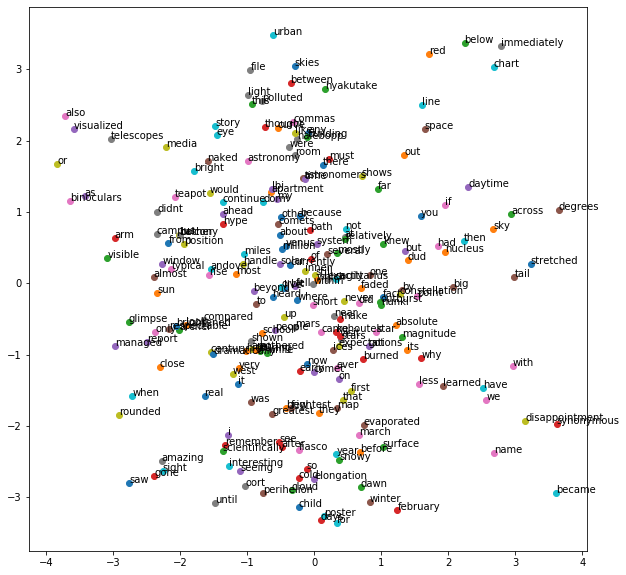

In [8]:
# now that the model has veen fit - question - Is 1000 epochs really necessary? could we do it with less? 
# Obtaining the weights from the neural network. 
# These are the so called word embeddings

# The input layer 
weights = model.get_weights()[0]

# Creating a dictionary to store the embeddings in. The key is a unique word and 
# the value is the numeric vector
embedding_dict = {}
for word in words: 
    embedding_dict.update({
        word: weights[unique_word_dict.get(word)]
        })

# Ploting the embeddings
plt.figure(figsize=(10, 10))
for word in list(unique_word_dict.keys()):
    coord = embedding_dict.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))       

# Saving the embedding vector to a txt file
try:
    os.mkdir(f'{os.getcwd()}\\output')        
except Exception as e:
    print(f'Cannot create output folder: {e}')

with open(f'{os.getcwd()}\\output\\embedding_model_email.txt', 'w') as f:
    for key, value in embedding_dict.items():
        try:
            f.write(f'{key}: {value}\n')   
        except Exception as e:
            print(f'Cannot write word {key} to dict: {e}')   

In [10]:
# look at what is in the variables
embedding_dict


{'about': array([-0.5191885,  0.6757664], dtype=float32),
 'absolute': array([ 1.2131165, -0.5802003], dtype=float32),
 'across': array([2.9411683 , 0.97524667], dtype=float32),
 'after': array([-0.48488346, -2.2957225 ], dtype=float32),
 'ahead': array([-1.3692982,  0.975873 ], dtype=float32),
 'almost': array([-2.39616   ,  0.08658988], dtype=float32),
 'also': array([-3.7184613,  2.350193 ], dtype=float32),
 'amazing': array([-2.2796316, -2.4949923], dtype=float32),
 'an': array([-0.9350438, -0.9213805], dtype=float32),
 'andover': array([-1.5492313 ,  0.19499992], dtype=float32),
 'any': array([-0.09127634,  2.115167  ], dtype=float32),
 'apartment': array([-0.6419805,  1.2830441], dtype=float32),
 'archer': array([-2.0150473, -0.6516962], dtype=float32),
 'arm': array([-2.9792833,  0.6432884], dtype=float32),
 'as': array([-3.4285064,  1.2236203], dtype=float32),
 'astronomers': array([-0.16998306,  1.4811056 ], dtype=float32),
 'astronomy': array([-0.994306 ,  1.7147148], dtype=f

In [ ]:
kv = new KeyedVectors(512)
kv.add(words_list, vectors_list)
kv.save(`mywordvecs.kvmodel`)